# Stationarity and Differencing

## Stationarity
Time series data is said to be <em>stationary</em> if it does <em>not</em> exhibit trends or seasonality. That is, the mean, variance and covariance should be the same for any segment of the series, and are not functions of time.<br>

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("samples.csv", index_col= 0, parse_dates= True)

In [4]:
df.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


<AxesSubplot:title={'center':'Stationary Data'}>

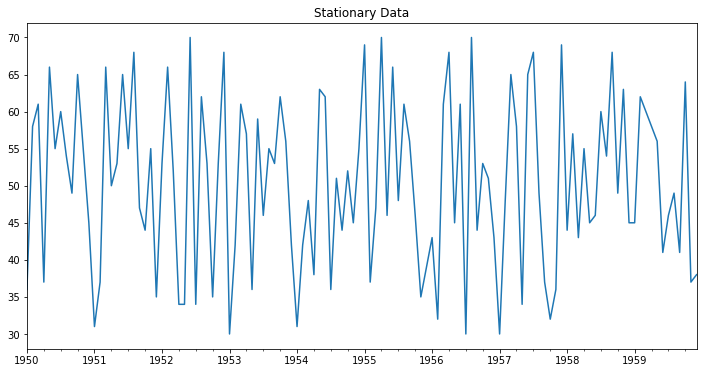

In [5]:
df["a"].plot(figsize= (12,6), title= "Stationary Data")

<AxesSubplot:title={'center':'Non-Stationary Data'}>

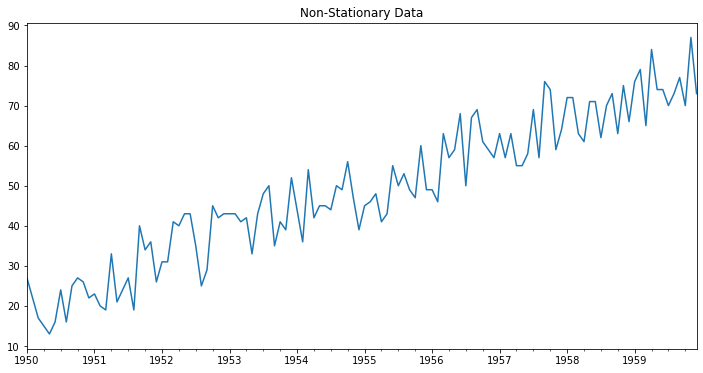

In [6]:
df["b"].plot(figsize= (12,6), title= "Non-Stationary Data")

<AxesSubplot:title={'center':'Non-Stationary Data'}>

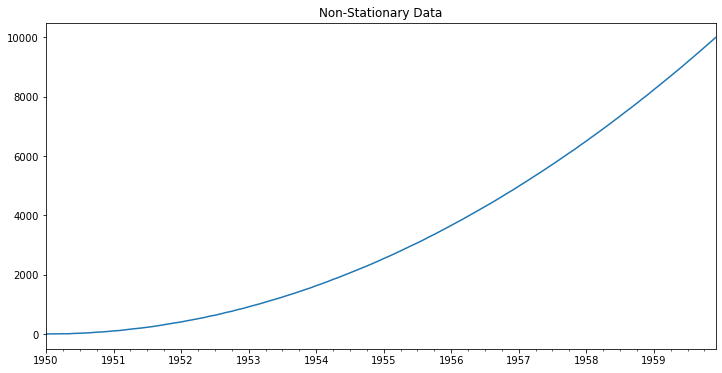

In [7]:
df["c"].plot(figsize= (12,6), title= "Non-Stationary Data")

## Differencing

### First Order Differencing
Non-stationary data can be made to look stationary through <em>differencing</em>. A simple method called <em>first order differencing</em> calculates the difference between consecutive observations.

&nbsp;&nbsp;&nbsp;&nbsp;$y^{\prime}_t = y_t - y_{t-1}$

In this way a linear trend is transformed into a horizontal set of values.


In [9]:
# Calculating First Order Differencing on "b" Column:

df["First_Order_Diff_b"] = df["b"] - df["b"].shift(1)

In [10]:
df.head()

,a,b,c,d,First_Order_Diff_b
1950-01-01,36,27,0,67,NaN
1950-02-01,58,22,3,31,-5.0
1950-03-01,61,17,5,67,-5.0
1950-04-01,37,15,8,47,-2.0
1950-05-01,66,13,8,62,-2.0


In [11]:
df[["b", "First_Order_Diff_b"]].head()

,b,First_Order_Diff_b
1950-01-01,27,NaN
1950-02-01,22,-5.0
1950-03-01,17,-5.0
1950-04-01,15,-2.0
1950-05-01,13,-2.0


<AxesSubplot:>

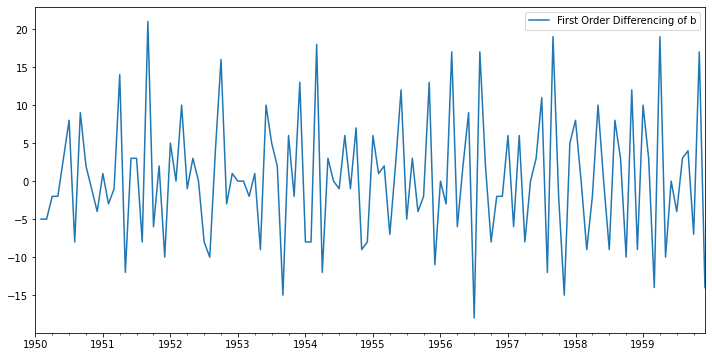

In [13]:
df["First_Order_Diff_b"].plot(figsize= (12,6), label= "First Order Differencing of b", legend= True)

In [14]:
# Same Thing can be Done by Using Pandas diff Method:

df["First_Order_Diff_b_Pandas"] = df["b"].diff(periods= 1)

In [15]:
df.head()

,a,b,c,d,First_Order_Diff_b,First_Order_Diff_b_Pandas
1950-01-01,36,27,0,67,NaN,NaN
1950-02-01,58,22,3,31,-5.0,-5.0
1950-03-01,61,17,5,67,-5.0,-5.0
1950-04-01,37,15,8,47,-2.0,-2.0
1950-05-01,66,13,8,62,-2.0,-2.0


In [16]:
df[["b", "First_Order_Diff_b", "First_Order_Diff_b_Pandas"]]

,b,First_Order_Diff_b,First_Order_Diff_b_Pandas
1950-01-01,27,NaN,NaN
1950-02-01,22,-5.0,-5.0
1950-03-01,17,-5.0,-5.0
1950-04-01,15,-2.0,-2.0
1950-05-01,13,-2.0,-2.0
...,...,...,...
1959-08-01,73,3.0,3.0
1959-09-01,77,4.0,4.0
1959-10-01,70,-7.0,-7.0
1959-11-01,87,17.0,17.0


## Second order differencing
Sometimes the first difference is not enough to attain stationarity, particularly if the trend is not linear. We can difference the already differenced values again to obtain a second order set of values.

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_{t}^{\prime} - y_{t-1}^{\prime} \\
&= (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) \\
&= y_t - 2y_{t-1} + y_{t-2}\end{split}$

<AxesSubplot:title={'center':'Non-Stationary Data'}>

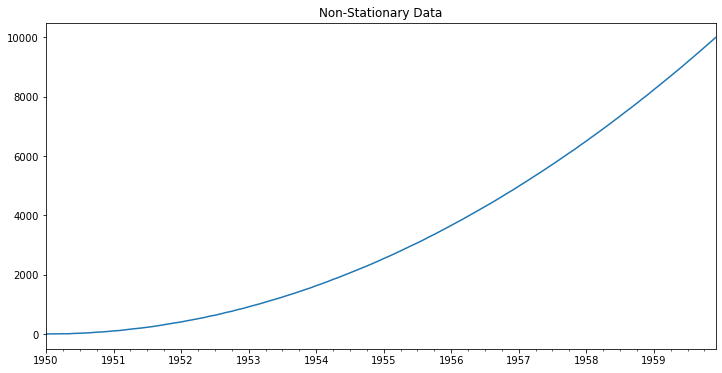

In [17]:
df["c"].plot(figsize= (12,6), title= "Non-Stationary Data")

In [18]:
# First Order Differencing on "c":

df["First_Order_Diff_c"] = df["c"].diff(periods= 1)

In [19]:
df.head()

,a,b,c,d,First_Order_Diff_b,First_Order_Diff_b_Pandas,First_Order_Diff_c
1950-01-01,36,27,0,67,NaN,NaN,NaN
1950-02-01,58,22,3,31,-5.0,-5.0,3.0
1950-03-01,61,17,5,67,-5.0,-5.0,2.0
1950-04-01,37,15,8,47,-2.0,-2.0,3.0
1950-05-01,66,13,8,62,-2.0,-2.0,0.0


<AxesSubplot:title={'center':'First Order Differencing of c'}>

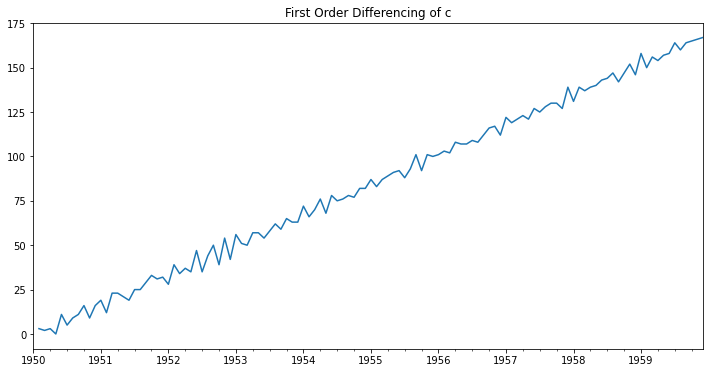

In [20]:
df["First_Order_Diff_c"].plot(figsize= (12,6), title= "First Order Differencing of c")

In [24]:
# Second Order Differencing on "c":

df["Second_Order_Diff_c"] = df["c"].diff().diff()

In [25]:
df.head()

,a,b,c,d,First_Order_Diff_b,First_Order_Diff_b_Pandas,First_Order_Diff_c,Second_Order_Diff_c
1950-01-01,36,27,0,67,NaN,NaN,NaN,NaN
1950-02-01,58,22,3,31,-5.0,-5.0,3.0,NaN
1950-03-01,61,17,5,67,-5.0,-5.0,2.0,-1.0
1950-04-01,37,15,8,47,-2.0,-2.0,3.0,1.0
1950-05-01,66,13,8,62,-2.0,-2.0,0.0,-3.0


<AxesSubplot:title={'center':'Second Order Differencing of c'}>

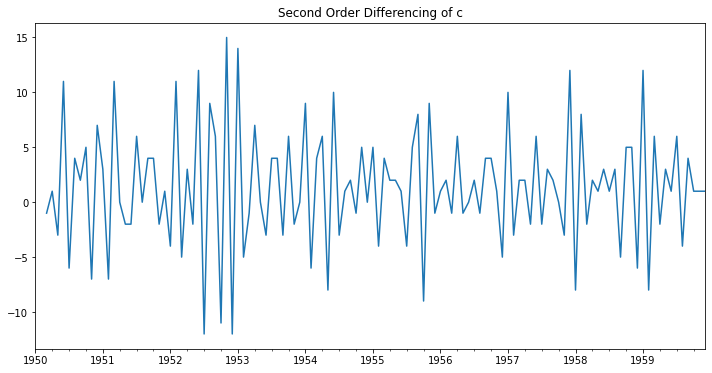

In [26]:
df["Second_Order_Diff_c"].plot(figsize= (12,6), title= "Second Order Differencing of c")